##SPRINT 2 ##

Understanding The Data


Importing the required libraries

In [17]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

Loading the data

In [18]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [19]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the data

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
y_train[0]

5

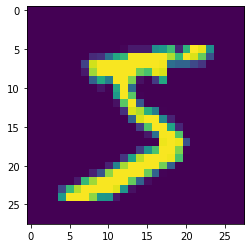

In [22]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Reshaping the data

In [23]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

Applying One Hot Encoding

In [24]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model Building

In [26]:
model = Sequential()

Add CNN Layers

In [27]:
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation ='softmax'))

Compiling the Model

In [28]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Train the Model

In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2716 - accuracy: 0.9495 - val_loss: 0.0983 - val_accuracy: 0.9704
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0736 - accuracy: 0.9778 - val_loss: 0.0977 - val_accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0984 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.0900 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.1019 - val_accuracy: 0.9786


Observing the Metrics

In [30]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.1018558070063591, 0.978600025177002]


Test the model

In [31]:
prediction= model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 132ms/step
[[1.6052966e-15 1.3782681e-22 1.0983335e-11 2.8333186e-11 2.2269421e-21
  9.1321964e-17 9.1143056e-25 1.0000000e+00 5.4480907e-18 7.6089952e-15]
 [1.9074891e-12 8.5393044e-16 1.0000000e+00 3.4345474e-18 1.0676965e-20
  4.8750250e-23 1.0958382e-09 7.4590301e-24 2.6790779e-17 9.1999755e-21]
 [1.6248169e-10 9.9999917e-01 2.3089981e-08 2.9216416e-13 2.1562991e-08
  9.8532624e-08 9.4410254e-08 2.1687930e-08 6.1200871e-07 4.1682935e-11]
 [1.0000000e+00 7.4189875e-17 3.0994946e-11 4.3114386e-18 2.7540300e-15
  2.4573536e-17 1.5737231e-10 2.8232763e-17 1.4580496e-12 5.5607320e-13]]


Saving the Model

In [32]:
model.save('models/mnistCNN.h5')

In [34]:
from tensorflow.keras.models import load_model
model = load_model(r'/content/models/mnistCNN.h5')
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd